In [ ]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import cross_val_score

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score

# Setting color palatte
colors = ['#007bff','#fcb107','#28a745','#dc3545']
sns.set_theme('talk')
sns.set_palette(colors)

plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize'] = [8, 5]

In [ ]:
# reading data
df = pd.read_csv("data.csv")

# view first five rows
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
# shape of the data
print("Number of instances  ::", df.shape[0])
print("Number of attributes ::", df.shape[1])

Number of instances  :: 614
Number of attributes :: 13


In [ ]:
# Columns names.
column_list = df.columns.tolist()
print("List of columns:: ", column_list)

List of columns::  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [ ]:
# Clean up the column names.
rename_col = {
    'ApplicantIncome':'applicant_income',
    'CoapplicantIncome':'coapplicant_income',
    'LoanAmount':'loan_amount'
}

df.rename(columns=rename_col, inplace=True)
df.rename(columns={col:col.lower() for col in column_list}, inplace=True)

In [ ]:
# view
df.head()

loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
0              5849                 0.0          NaN             360.0   
1              4583              1508.0        128.0             360.0   
2              3000                 0.0         66.0             360.0   
3              2583              2358.0        120.0             360.0   
4              6000                 0.0        141.0             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
# Check if there is any duplicate records present in the data
df.duplicated().sum()

0

In [ ]:
# Check the datatypes.
df.dtypes

loan_id                object
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [ ]:
# Check the unique values in categorical data.
columns = ['gender',
            'married',
            'dependents',
            'education',
            'self_employed',
            'credit_history',
            'property_area',
            'loan_status'
        ]

for col in columns:
    print(f"{col.upper()} :: {df[col].unique()}")
    print(df[col].value_counts())
    print("---"*10)

GENDER :: ['Male' 'Female' nan]
gender
Male      489
Female    112
Name: count, dtype: int64
------------------------------
MARRIED :: ['No' 'Yes' nan]
married
Yes    398
No     213
Name: count, dtype: int64
------------------------------
DEPENDENTS :: ['0' '1' '2' '3+' nan]
dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
------------------------------
EDUCATION :: ['Graduate' 'Not Graduate']
education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
------------------------------
SELF_EMPLOYED :: ['No' 'Yes' nan]
self_employed
No     500
Yes     82
Name: count, dtype: int64
------------------------------
CREDIT_HISTORY :: [ 1.  0. nan]
credit_history
1.0    475
0.0     89
Name: count, dtype: int64
------------------------------
PROPERTY_AREA :: ['Urban' 'Rural' 'Semiurban']
property_area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
------------------------------
LOAN_STATUS :: ['Y' 'N']
loan_status
Y    422


In [ ]:

categorical_cols = ['gender',
            'married',
            'dependents',
            'education',
            'self_employed',
            'property_area',
            'loan_status'
        ]
for col in categorical_cols:
    try:
        df[col] = df[col].str.lower().str.replace(" ", "_")
        df[col] = df[col].astype('category')
    except AttributeError:
        pass

In [ ]:
# view
df.dtypes

loan_id                 object
gender                category
married               category
dependents            category
education             category
self_employed         category
applicant_income         int64
coapplicant_income     float64
loan_amount            float64
loan_amount_term       float64
credit_history         float64
property_area         category
loan_status           category
dtype: object

In [ ]:
df.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [ ]:
df.loan_status.value_counts(normalize=True)

loan_status
y    0.687296
n    0.312704
Name: proportion, dtype: float64

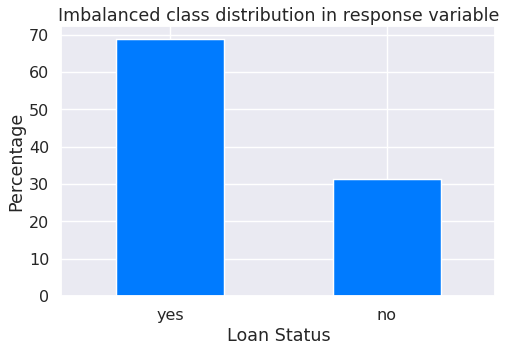

In [ ]:
# visualization
(df.loan_status.value_counts(normalize=True) * 100).plot(kind='bar')

# labels
plt.xlabel("Loan Status")
plt.ylabel("Percentage")
plt.title("Imbalanced class distribution in response variable")

plt.xticks(ticks=[0, 1], labels=['yes', 'no'], rotation=0)
plt.show()

In [ ]:
# Hypothesis testing for correlation in variables.
def compute_chi2(column):
    threshold = 0.05
    ct = pd.crosstab(df[column], df['loan_status'])
    result = stats.chi2_contingency(ct)

    print("Chi2-statistics:: ", result[0])
    print("p-value:: ", result[1])

    if result[1] < threshold:
        print("p-value is less than 0.05, the null hypothesis is rejected hence, %s & loan_status are dependent variables." %column)
    else:
        print("p-value is greater than 0.05, which failed to reject the null hypothesis hence, %s & loan_status are Independent variables." %column)

<ipython-input-17-0eb2a0175618>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b = df.groupby(by=['gender', 'loan_status']).count()['loan_id'] * 100 / df.groupby(by=['gender']).count()['loan_id']
<ipython-input-17-0eb2a0175618>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b = df.groupby(by=['gender', 'loan_status']).count()['loan_id'] * 100 / df.groupby(by=['gender']).count()['loan_id']


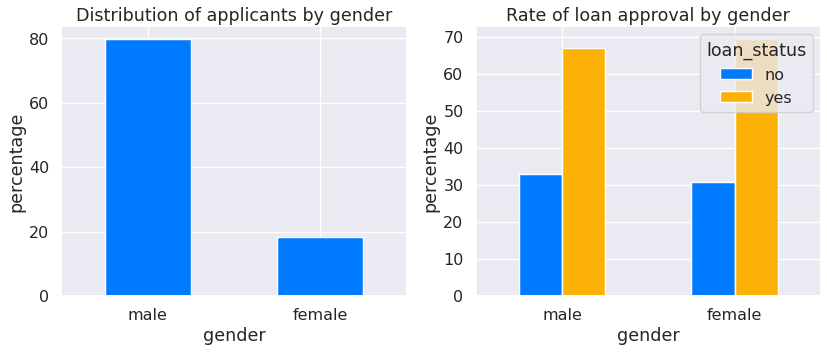

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Data preparation
a = df['gender'].value_counts() * 100 / len(df)
b = df.groupby(by=['gender', 'loan_status']).count()['loan_id'] * 100 / df.groupby(by=['gender']).count()['loan_id']

# Visualizations
# plot-1
a.plot(kind='bar', ax=ax1)

ax1.set_title("Distribution of applicants by gender")
ax1.set_xlabel("gender")
ax1.set_ylabel("percentage")

ax1.set_xticks(ticks=[0, 1], labels=['male', 'female'], rotation=0)

# plot-2
b.unstack().plot(kind='bar', ax=ax2)

ax2.set_title("Rate of loan approval by gender")
ax2.set_xlabel("gender")
ax2.set_ylabel("percentage")

ax2.legend(labels=['no', 'yes'], title='loan_status')
ax2.set_xticks(ticks=[0, 1], labels=['male', 'female'], rotation=0)

plt.show()

In [ ]:
compute_chi2('gender')

Chi2-statistics::  0.13962612116543877
p-value::  0.7086529816451106
p-value is greater than 0.05, which failed to reject the null hypothesis hence, gender & loan_status are Independent variables.


<ipython-input-19-77d6b158a118>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['credit_history', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['credit_history']).count()['loan_id']


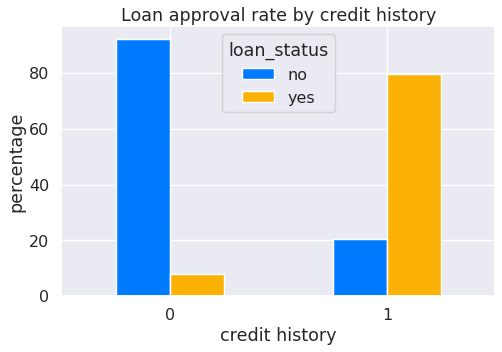

In [ ]:

# data preparation
a = df.groupby(by=['credit_history', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['credit_history']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by credit history')
plt.xlabel('credit history')
plt.ylabel('percentage')

plt.xticks(ticks=[0, 1], labels=[0, 1], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

In [ ]:
compute_chi2('credit_history')

Chi2-statistics::  174.63729658142535
p-value::  7.184759548750746e-40
p-value is less than 0.05, the null hypothesis is rejected hence, credit_history & loan_status are dependent variables.


<ipython-input-21-aeb0cf923abc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['education', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['education']).count()['loan_id']
<ipython-input-21-aeb0cf923abc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['education', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['education']).count()['loan_id']


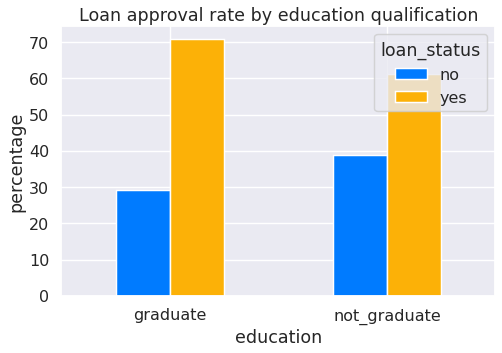

In [ ]:

# data preparation
a = df.groupby(by=['education', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['education']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by education qualification')
plt.xlabel('education')
plt.ylabel('percentage')

plt.xticks(ticks=[0, 1], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

In [ ]:
# Hypothesis test - 'Education' vs. 'Loan status'
compute_chi2('education')

Chi2-statistics::  4.091490413303621
p-value::  0.04309962129357355
p-value is less than 0.05, the null hypothesis is rejected hence, education & loan_status are dependent variables.


<ipython-input-23-3efe459ba617>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['property_area', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['property_area']).count()['loan_id']
<ipython-input-23-3efe459ba617>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['property_area', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['property_area']).count()['loan_id']


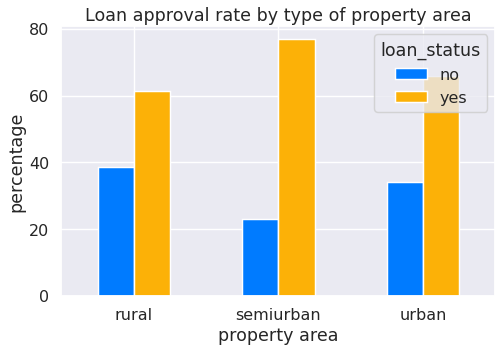

In [ ]:
# property_area and loan status
# data preparation
a = df.groupby(by=['property_area', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['property_area']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by type of property area')
plt.xlabel('property area')
plt.ylabel('percentage')

plt.xticks(ticks=[0, 1, 2], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

<ipython-input-24-16ee03cf0463>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['self_employed', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['self_employed']).count()['loan_id']
<ipython-input-24-16ee03cf0463>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(by=['self_employed', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['self_employed']).count()['loan_id']


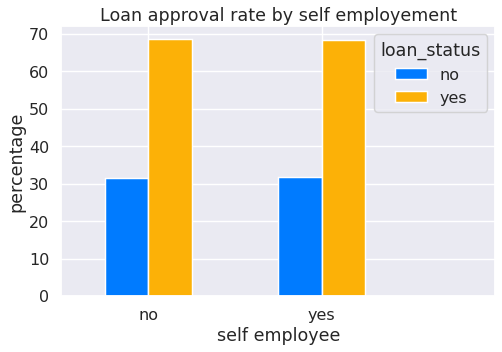

In [ ]:
# self_employed and loan status
# data preparation
a = df.groupby(by=['self_employed', 'loan_status']).count()['loan_id']* 100 / df.groupby(by=['self_employed']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by self employement')
plt.xlabel('self employee')
plt.ylabel('percentage')

plt.xticks(ticks=[0, 1, 2], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

In [ ]:
# Correation between for categorical variables and loan status
cat_cols = ['gender', 'married', 'dependents', 'education', 'self_employed',
           'property_area', 'credit_history']
scores = []
label = 'loan_status'
for col in cat_cols:
    threshold = 0.05
    ct = pd.crosstab(df[col], df[label])
    result = stats.chi2_contingency(ct)
    scores.append((label, col, result[0], round(result[1], 5)))

In [ ]:
corr_df = pd.DataFrame(scores, columns=['target', 'cat_feature', 'chi2_stats', 'p-value'])
corr_df.style.highlight_between(subset=['p-value'], left=-1, right=0.05, color='skyblue')

In [ ]:
# Descriptive analysis for numerical variable
subsets = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
yes_d = round(df.loc[df.loan_status=='y', subsets].describe(), 2)
no_d = round(df.loc[df.loan_status=='n', subsets].describe(), 2)

pd.concat([yes_d, no_d], keys=["Loan status-yes", "Loan status-No"], axis=1)

Loan status-yes                                                  \
      applicant_income coapplicant_income loan_amount loan_amount_term   
count           422.00             422.00      411.00           414.00   
mean           5384.07            1504.52      144.29           341.07   
std            5765.44            1924.75       85.48            63.25   
min             210.00               0.00       17.00            12.00   
25%            2877.50               0.00      100.00           360.00   
50%            3812.50            1239.50      126.00           360.00   
75%            5771.50            2297.25      161.00           360.00   
max           63337.00           20000.00      700.00           480.00   

        Loan status-No                                                  
      applicant_income coapplicant_income loan_amount loan_amount_term  
count           192.00             192.00      181.00           186.00  
mean           5446.08            1877.81      151.22           344.06  
std            6819.56            4384.06       85.86            69.24  
min             150.00               0.00        9.00            36.00  
25%            2885.00               0.00      100.00           360.00  
50%            3833.50             268.00      129.00           360.00  
75%            5861.25            2273.75      176.00           360.00  
max           81000.00           41667.00      570.00           480.00

In [ ]:
# One way ANOVA hypothesis test.

f_stats, p_value = stats.f_oneway(df[df.loan_status == 'y']['applicant_income'],
                                  df[df.loan_status=='n']['applicant_income'])

print("ANOVA hypothesis test::")
print("F_statistics::", f_stats)
print("P-value::", p_value)

ANOVA hypothesis test::
F_statistics:: 0.013574218522301743
P-value:: 0.907287812130378


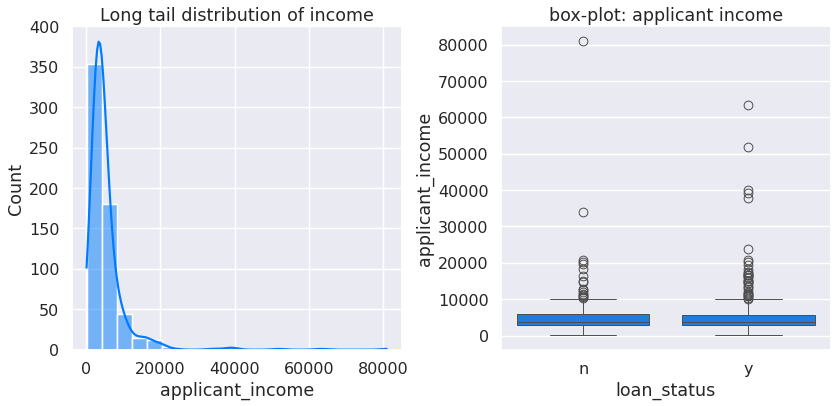

In [ ]:
# applicant income
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

sns.histplot(data=df, x='applicant_income', bins=20, kde=True, ax=ax1)
ax1.set_title("Long tail distribution of income")

sns.boxplot(data=df, y='applicant_income', x='loan_status', ax=ax2)
ax2.set_title("box-plot: applicant income")
plt.show()

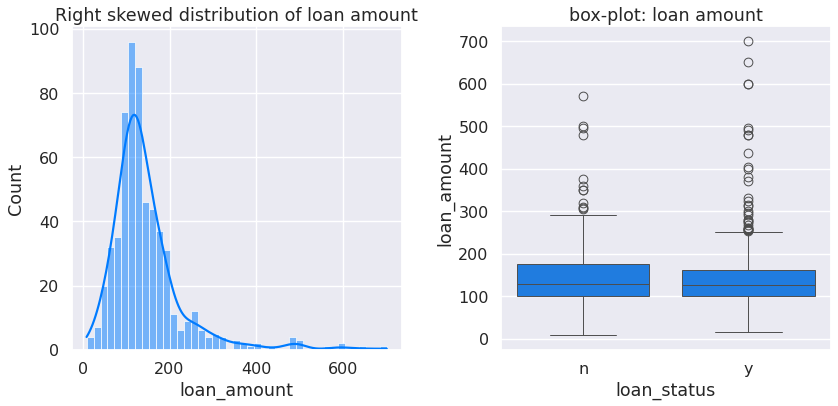

In [ ]:
# coapplicant income
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

sns.histplot(data=df, x='loan_amount', kde=True, ax=ax1)
ax1.set_title("Right skewed distribution of loan amount")

sns.boxplot(data=df, y='loan_amount', x='loan_status', ax=ax2)
ax2.set_title("box-plot: loan amount")
plt.show()

In [ ]:
# Statistical description
df[subsets].corr().style.background_gradient(axis=0)

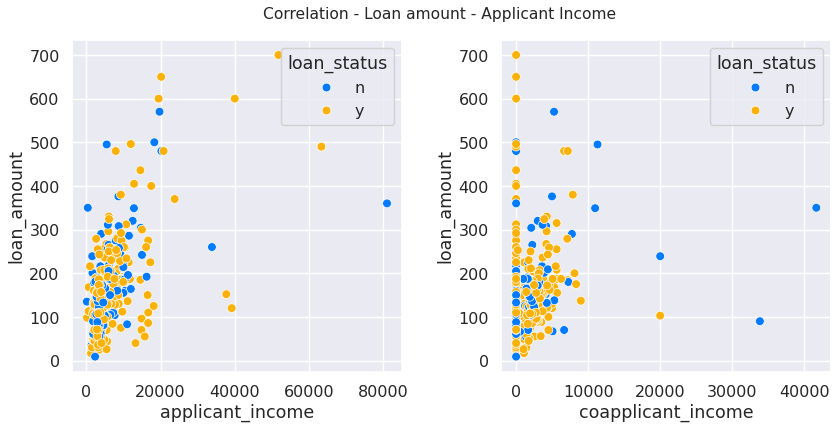

In [ ]:
# if there is linear relation between these two income variables with loan_amount.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3, top=0.9)
fig.suptitle("Correlation - Loan amount - Applicant Income", size=16)

sns.scatterplot(data=df, x='applicant_income', y='loan_amount', hue='loan_status', ax=ax1)
sns.scatterplot(data=df, x='coapplicant_income', y='loan_amount', hue='loan_status', ax=ax2)
plt.show()

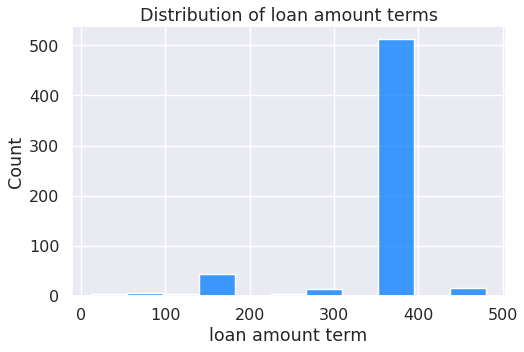

In [ ]:
# Distribution of loan_amount_term
sns.histplot(data=df, x='loan_amount_term')
plt.title("Distribution of loan amount terms")
plt.xlabel("loan amount term")
plt.show()

In [ ]:
# log transformation
df['loan_amount'] = np.log1p(df['loan_amount'])
df['applicant_income'] = np.log1p(df['applicant_income'])
df['coapplicant_income'] = np.log1p(df['coapplicant_income'])

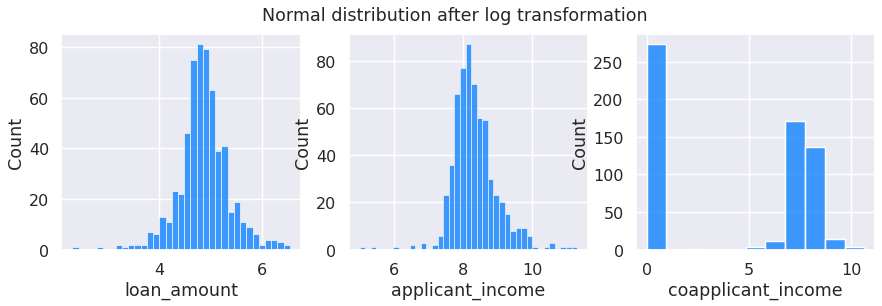

In [ ]:
# Plot - Normal distribution after log transformation
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

fig.suptitle("Normal distribution after log transformation", size=18)

sns.histplot(data=df, x='loan_amount', ax=ax1)
sns.histplot(data=df, x='applicant_income', ax=ax2)
sns.histplot(data=df, x='coapplicant_income', ax=ax3)

plt.show()

In [ ]:
# numeric features
numeric_features = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
numeric_transformer = Pipeline(
    steps = [
        ("knn_imputer", KNNImputer(n_neighbors=3)),
        ("scaler", StandardScaler())
    ]
)

# categorical features
categorical_features = ['gender', 'married', 'self_employed', 'dependents', 'credit_history', 'education', 'property_area']
categorical_transformer = Pipeline(
    steps = [
        ("simple_imputer", SimpleImputer(strategy='most_frequent')),
        ("oh_encoder", OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessors
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
# split the data into training and validation datasets.
df_full, df_test = train_test_split(df, test_size=0.1, shuffle=True, stratify=df['loan_status'], random_state=42)
df_train, df_valid = train_test_split(df_full, test_size=0.22, shuffle=True, stratify=df_full['loan_status'],random_state=42)

In [ ]:
# split the data into X and y
X_train, Y_train = df_train[numeric_features + categorical_features], df_train['loan_status']
X_val, Y_val = df_valid[numeric_features + categorical_features], df_valid['loan_status']

In [ ]:
# Data Transformation
x_train = pd.DataFrame(preprocessor.fit_transform(X_train))
y_train = (Y_train == 'y').astype('int').reset_index(drop=True)

x_val = pd.DataFrame(preprocessor.transform(X_val))
y_val = (Y_val == 'y').astype('int').reset_index(drop=True)

In [ ]:
# Base model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

# prediction
y_preds = model.predict(x_val)

# model evaluation
score = f1_score(y_val, y_preds, average='macro')
print("F1 Score:: %f" % score)

F1 Score:: 0.736748


In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
# spot checking for machine learning algorithms using k-fold==10
models = {
    'rf_clf': RandomForestClassifier(random_state=42),
    'lr_clf': LogisticRegression(max_iter=1000, random_state=42),
    'cart_clf': DecisionTreeClassifier(random_state=42),
    'knn_clf' : KNeighborsClassifier(),
    'svc_clf' : SVC(random_state=42),
}

scores = []
for name, clf in models.items():
    CV = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    auc = cross_val_score(clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1")
    scores.append((name, np.mean(auc)))

In [ ]:
pd.DataFrame(scores, columns=['model', 'f1score']).sort_values(by='f1score', ascending=False).style.highlight_max(subset=['f1score'])

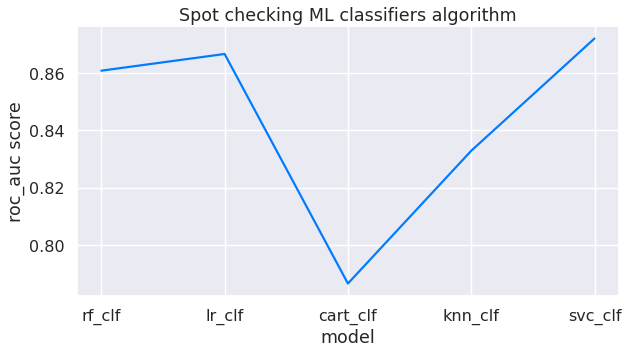

In [ ]:
# Data preparation
scores = pd.DataFrame(scores, columns=['model', 'f1score'])

# plots
plt.figure(figsize=(10, 5))
plt.plot(scores.model, scores.f1score)

plt.title("Spot checking ML classifiers algorithm")
plt.xlabel("model")
plt.ylabel("roc_auc score")

plt.show()

In [ ]:
# Support Vector machine classifier
# let's find the best k values for further evaluation
svc_clf = SVC(random_state=42)
for k in range(2, 20):
    CV = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    score = cross_val_score(svc_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("k=%d; socre=%f" %(k, np.mean(score)))

k=2; socre=0.701845
k=3; socre=0.721855
k=4; socre=0.716689
k=5; socre=0.721990
k=6; socre=0.714814
k=7; socre=0.716655
k=8; socre=0.718014
k=9; socre=0.718799
k=10; socre=0.715513
k=11; socre=0.713915
k=12; socre=0.716468
k=13; socre=0.710981
k=14; socre=0.709537
k=15; socre=0.708144
k=16; socre=0.712611
k=17; socre=0.705664
k=18; socre=0.716343
k=19; socre=0.709951


In [ ]:
CV = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

In [ ]:
# C == 3
for c in [1, 3, 5, 7, 9, 11, 15, 20, 30, 50, 100]:
    svc_clf = SVC(C=c, random_state=42)
    score = cross_val_score(svc_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("C=%d; socre=%f, std=%.3f" %(c, np.mean(score), np.std(score)))

C=1; socre=0.718014, std=0.065
C=3; socre=0.727124, std=0.066
C=5; socre=0.712077, std=0.050
C=7; socre=0.699171, std=0.050
C=9; socre=0.684538, std=0.045
C=11; socre=0.674379, std=0.050
C=15; socre=0.661965, std=0.051
C=20; socre=0.637812, std=0.052
C=30; socre=0.633902, std=0.052
C=50; socre=0.639668, std=0.049
C=100; socre=0.639681, std=0.052


In [ ]:
# gamma == 0.1
for g in [1, 0.1, 0.01, 0.001]:
    svc_clf = SVC(C=3, gamma=g, random_state=42)
    score = cross_val_score(svc_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("gamma=%f; socre=%f, std=%.3f" %(g, np.mean(score), np.std(score)))

gamma=1.000000; socre=0.563662, std=0.045
gamma=0.100000; socre=0.732151, std=0.071
gamma=0.010000; socre=0.721004, std=0.065
gamma=0.001000; socre=0.406896, std=0.002


In [ ]:
# degree == 2
for d in [1, 2, 3, 4, 5, 6, 7, 9, 10]:
    svc_clf = SVC(C=3, kernel='poly', gamma=0.1, degree=d, random_state=42)
    score = cross_val_score(svc_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("degree=%d; socre=%f, std=%.3f" %(d, np.mean(score), np.std(score)))

degree=1; socre=0.721004, std=0.065
degree=2; socre=0.713049, std=0.070
degree=3; socre=0.724677, std=0.058
degree=4; socre=0.698645, std=0.051
degree=5; socre=0.694915, std=0.062
degree=6; socre=0.669665, std=0.057
degree=7; socre=0.669638, std=0.056
degree=9; socre=0.628756, std=0.034
degree=10; socre=0.601948, std=0.054


In [ ]:
# kernel == 2
for kr in ['linear', 'poly', 'rbf', 'sigmoid'] :
    svc_clf = SVC(C=3, kernel=kr, gamma=0.1, random_state=42)
    score = cross_val_score(svc_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("kernel=%s; socre=%f, std=%.3f" %(kr, np.mean(score), np.std(score)))

kernel=linear; socre=0.721004, std=0.065
kernel=poly; socre=0.724677, std=0.058
kernel=rbf; socre=0.732151, std=0.071
kernel=sigmoid; socre=0.669926, std=0.060


In [ ]:
# final model
svc = SVC(C=3, gamma=0.1, random_state=42)
svc.fit(x_train, y_train)
y_preds = svc.predict(x_val)
print("score::%f" %f1_score(y_val, y_preds, average='macro'))

score::0.726776


In [ ]:
# RandomForestClassifier k = 15
RF_clf = RandomForestClassifier(random_state=42)
for k in range(2, 20):
    CV = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    score = cross_val_score(RF_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("K-fold=%d, socre=%f, std=%.3f" %(k, np.mean(score), np.std(score)))

K-fold=2, socre=0.706562, std=0.022
K-fold=3, socre=0.701173, std=0.048
K-fold=4, socre=0.715985, std=0.024
K-fold=5, socre=0.708743, std=0.069
K-fold=6, socre=0.708265, std=0.051
K-fold=7, socre=0.716652, std=0.055
K-fold=8, socre=0.719051, std=0.050
K-fold=9, socre=0.705722, std=0.056
K-fold=10, socre=0.717190, std=0.075
K-fold=11, socre=0.719744, std=0.072
K-fold=12, socre=0.716996, std=0.075
K-fold=13, socre=0.717239, std=0.080
K-fold=14, socre=0.718409, std=0.074
K-fold=15, socre=0.723055, std=0.080
K-fold=16, socre=0.717702, std=0.084
K-fold=17, socre=0.717298, std=0.114
K-fold=18, socre=0.712053, std=0.098
K-fold=19, socre=0.717887, std=0.113


In [ ]:
CV = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [ ]:
# n_estimators == 250
for n in range(200, 400, 50):
    RF_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(RF_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("n_estimator=%d, socre=%f, std=%.3f" %(n, np.mean(score), np.std(score)))

n_estimator=200, socre=0.724482, std=0.085
n_estimator=250, socre=0.729259, std=0.085
n_estimator=300, socre=0.722765, std=0.091
n_estimator=350, socre=0.717182, std=0.094


In [ ]:
# max_depth == 15 for n_estimator=110
for n in range(10, 500, 50):
    for depth in [5, 7, 9, 8, 10, 11, 12, 13, 15]:
        RF_clf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        score = cross_val_score(RF_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
        print("n_estimator=%d, depth=%d, socre=%f, std=%.3f" %(n, depth, np.mean(score), np.std(score)))

n_estimator=10, depth=5, socre=0.712612, std=0.097
n_estimator=10, depth=7, socre=0.711606, std=0.075
n_estimator=10, depth=9, socre=0.734496, std=0.088
n_estimator=10, depth=8, socre=0.720620, std=0.096
n_estimator=10, depth=10, socre=0.710200, std=0.078
n_estimator=10, depth=11, socre=0.724541, std=0.082
n_estimator=10, depth=12, socre=0.718467, std=0.085
n_estimator=10, depth=13, socre=0.703423, std=0.085
n_estimator=10, depth=15, socre=0.721050, std=0.085
n_estimator=60, depth=5, socre=0.719063, std=0.085
n_estimator=60, depth=7, socre=0.721753, std=0.086
n_estimator=60, depth=9, socre=0.733138, std=0.095
n_estimator=60, depth=8, socre=0.723997, std=0.095
n_estimator=60, depth=10, socre=0.732262, std=0.085
n_estimator=60, depth=11, socre=0.720391, std=0.088
n_estimator=60, depth=12, socre=0.725717, std=0.092
n_estimator=60, depth=13, socre=0.717216, std=0.080
n_estimator=60, depth=15, socre=0.723070, std=0.088
n_estimator=110, depth=5, socre=0.716341, std=0.089
n_estimator=110, dep

In [ ]:
# min_samples_split == 3
for samples in [3, 6, 7, 8, 9, 10, 50]:
    RF_clf = RandomForestClassifier(n_estimators=110, max_depth=15, min_samples_split=samples, random_state=42)
    score = cross_val_score(RF_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("min-samples=%d, socre=%f, std=(+-%.3f)" %(samples, np.mean(score), np.std(score)))

min-samples=3, socre=0.736309, std=(+-0.090)
min-samples=6, socre=0.733674, std=(+-0.083)
min-samples=7, socre=0.729986, std=(+-0.084)
min-samples=8, socre=0.733319, std=(+-0.075)
min-samples=9, socre=0.730030, std=(+-0.077)
min-samples=10, socre=0.733704, std=(+-0.088)
min-samples=50, socre=0.716341, std=(+-0.089)


In [ ]:
# max_features == 'sqrt'
for features in list(range(1, 22, 2))+['sqrt', 'log2']:
    RF_clf = RandomForestClassifier(n_estimators=110,
                                    max_depth=15,
                                    min_samples_split=3,
                                    min_samples_leaf=1,
                                    max_features=features,
                                    warm_start=True,
                                    random_state=42)
    score = cross_val_score(RF_clf, x_train, y_train, cv=CV, n_jobs=-1, scoring="f1_macro")
    print("max-features=%s, socre=%f, std=(+-%.3f)" %(features, np.mean(score), np.std(score)))

max-features=1, socre=0.705393, std=(+-0.093)
max-features=3, socre=0.715442, std=(+-0.080)
max-features=5, socre=0.730218, std=(+-0.085)
max-features=7, socre=0.713781, std=(+-0.078)
max-features=9, socre=0.716620, std=(+-0.081)
max-features=11, socre=0.724054, std=(+-0.088)
max-features=13, socre=0.723633, std=(+-0.081)
max-features=15, socre=0.725086, std=(+-0.078)
max-features=17, socre=0.719031, std=(+-0.078)
max-features=19, socre=0.732536, std=(+-0.069)
max-features=21, socre=0.719233, std=(+-0.080)
max-features=sqrt, socre=0.736309, std=(+-0.090)
max-features=log2, socre=0.736309, std=(+-0.090)


In [ ]:
# final model
RF_clf = RandomForestClassifier(n_estimators=110,
                                max_depth=15,
                                min_samples_split=3,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                n_jobs=-1,
                                random_state=42)
RF_clf.fit(x_train, y_train)
y_preds = RF_clf.predict(x_val)
print("score::%f" %f1_score(y_val, y_preds, average='macro'))

score::0.740518


In [ ]:
# C = 0.1
for c in [0.1, 0.2, 0.3, 0.5, 0.8, 1, 1.2]:
    LR_clf = LogisticRegression(solver='liblinear', C=c, random_state=42)
    LR_clf.fit(x_train, y_train)
    y_preds = LR_clf.predict(x_val)
    print("C::%f score::%f" % (c, f1_score(y_val, y_preds, average='macro')))

C::0.100000 score::0.745061
C::0.200000 score::0.736748
C::0.300000 score::0.736748
C::0.500000 score::0.736748
C::0.800000 score::0.736748
C::1.000000 score::0.736748
C::1.200000 score::0.736748


In [ ]:
# models
RF_clf = RandomForestClassifier(n_estimators=110,
                                max_depth=15,
                                min_samples_split=3,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                n_jobs=-1,
                                random_state=42)
SVC_clf = SVC(C=3, gamma=0.1, random_state=42)
LR_clf = LogisticRegression(solver='liblinear', C=0.1, random_state=42)

for model in [RF_clf, SVC_clf, LR_clf]:
    model.fit(x_train, y_train)
    y_preds = model.predict(x_val)
    score = f1_score(y_val, y_preds, average='macro')
    print("Classifier:: %s" % model)
    print("F1-Score::%f" % score)

Classifier:: RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=110,
                       n_jobs=-1, random_state=42)
F1-Score::0.740518
Classifier:: SVC(C=3, gamma=0.1, random_state=42)
F1-Score::0.726776
Classifier:: LogisticRegression(C=0.1, random_state=42, solver='liblinear')
F1-Score::0.745061


In [ ]:
# Data preparation
X_test, Y_test = df_test[numeric_features + categorical_features], df_test['loan_status']
x_test = pd.DataFrame(preprocessor.transform(X_test))
y_test = (Y_test == 'y').astype('int').reset_index(drop=True)

In [ ]:
import joblib
model_name = type(model).__name__  # Get the model name (e.g., 'SVC' or 'LogisticRegression')
model_file = f"/content/{model_name}_model.joblib"
joblib.dump(model, model_file)
print(f"{model_name} model saved as {model_file}")

LogisticRegression model saved as /content/LogisticRegression_model.joblib


In [ ]:
from joblib import load

numeric_features = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
categorical_features = ['gender', 'married', 'self_employed', 'dependents', 'credit_history', 'education', 'property_area']

X_test = df_test[numeric_features + categorical_features]
# y_test = df_test['loan_status']  # If you need y_test for evaluation later

X_test_processed = preprocessor.transform(X_test)

# Load the saved model
loaded_model = load("/content/LogisticRegression_model.joblib")
prediction = loaded_model.predict(X_test_processed)
print(prediction)


[0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
y_test = df_test['loan_status']

y_test = (y_test == 'y').astype(int)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, prediction))

Accuracy: 82.26%
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



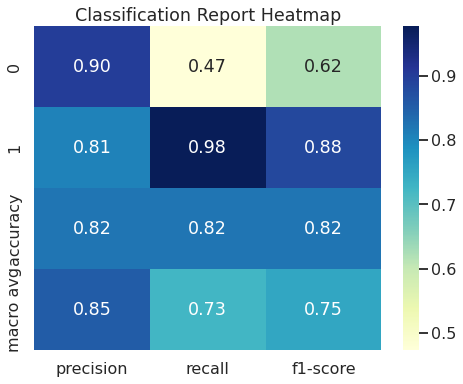

In [ ]:
report = classification_report(y_test, prediction, output_dict=True)


report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']].iloc[:-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()